In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



In [249]:
# Read in the data
client = pd.read_csv('client.csv')
electricity_prices = pd.read_csv('electricity_prices.csv')
gas_prices = pd.read_csv('gas_prices.csv')
historical_weather = pd.read_csv('historical_weather.csv')
forecast_weather = pd.read_csv('forecast_weather.csv')
train = pd.read_csv('train.csv')
county_lon_lat = (pd.read_csv('county_lon_lats.csv')
                .drop(columns = ["Unnamed: 0"])
                )


## EDA functions   

In [346]:
# Explore the client data

def eda(dataframe):
    print('List of columns: \n', dataframe.columns)
    print('\n DF Types: \n', dataframe.dtypes)
    print("\n DF Dimensions: \n", dataframe.shape)
    print('\n Missing Values: \n', dataframe.isnull().sum())
    print('\n', dataframe.head())
    for col in dataframe.columns:
        if 'date' in col:
            dataframe[col] = pd.to_datetime(dataframe[col])
    print('Updated DF Types: ', dataframe.dtypes)

def date_features(dataframe): # Creating new features from the date column for year, quarter, month, week, and day
    dataframe['year'] = dataframe['date'].dt.year
    dataframe['quarter'] = dataframe['date'].dt.quarter
    dataframe['month'] = dataframe['date'].dt.month
    dataframe['week'] = dataframe['date'].dt.isocalendar().week
    dataframe['day'] = dataframe['date'].dt.day
    dataframe['hour'] = dataframe['date'].dt.hour
    dataframe['day_of_year'] = dataframe['date'].dt.dayofyear
    dataframe['day_of_month'] = dataframe['date'].dt.day
    dataframe['day_of_week'] = dataframe['date'].dt.weekday
    return dataframe

def date_features2(dataframe): # Creating new features from the date column for year, quarter, month, week, and day
    dataframe['year'] = dataframe['datetime'].dt.year
    dataframe['quarter'] = dataframe['datetime'].dt.quarter
    dataframe['month'] = dataframe['datetime'].dt.month
    dataframe['week'] = dataframe['datetime'].dt.isocalendar().week
    dataframe['day'] = dataframe['datetime'].dt.day
    dataframe['hour'] = dataframe['datetime'].dt.hour
    return dataframe


def date_features3(dataframe): # Creating new features from the date column for year, quarter, month, week, and day
    dataframe['year'] = dataframe['forecast_datetime'].dt.year
    dataframe['quarter'] = dataframe['forecast_datetime'].dt.quarter
    dataframe['month'] = dataframe['forecast_datetime'].dt.month
    dataframe['week'] = dataframe['forecast_datetime'].dt.isocalendar().week
    dataframe['day'] = dataframe['forecast_datetime'].dt.day
    dataframe['hour'] = dataframe['date'].dt.hour
    return dataframe

## Client EDA

In [ ]:
 
    # 1.
    hw_df[['latitude', 'longitude']] = hw_df[['latitude', 'longitude']].astype(float).round(1)
    
    # 2.
    hw_df = hw_df.merge(locations, how='left', on=['latitude', 'longitude'])
    
    # 3.
    hw_df.dropna(axis=0, inplace=True)
    
    # 4.
    hw_df['county'] = hw_df['county'].astype('int64')
    
    # 5.
    hw_df.drop(['latitude', 'longitude'], axis=1, inplace=True)
    
    # 6.
    hw_df['datetime'] = pd.to_datetime(hw_df['datetime'], utc=True)
    
    # 7.
    hw_df_mean = hw_df.groupby([hw_df['datetime']
                                .dt.to_period('h')])[list(hw_df.drop(['county', 'datetime', 'data_block_id'], axis=1)
                                                                           .columns)].mean().reset_index()
    hw_df_mean['datetime'] = pd.to_datetime(hw_df_mean['datetime'].dt.to_timestamp(), utc=True)
    
    hw_df_mean= hw_df_mean.merge(hw_df[['datetime', 'data_block_id']], how='left', on='datetime')
    
    # 8. 
    hw_df_county = hw_df.groupby(['county', hw_df['datetime'].dt.to_period('h')])[list(hw_df.drop(['county', 'datetime', 'data_block_id'], axis=1).columns)].mean().reset_index()
    hw_df_county['datetime'] = pd.to_datetime(hw_df_county['datetime'].dt.to_timestamp(), utc=True)
    hw_df_county = hw_df_county.merge(hw_df[['datetime', 'data_block_id']], how='left', on='datetime')
    hw_df_county.drop_duplicates(inplace=True)


In [ ]:
# Holiday dates

# 2021 - 2024
holiday_dates = [
    '2021-01-01',  # New Year's Day
    '2021-01-18',  # Martin Luther King Jr. Day
    '2021-02-14',  # Valentine's Day
    '2021-03-17',  # St. Patrick's Day
    '2021-04-04',  # Easter Sunday
    '2021-05-31',  # Memorial Day
    '2021-07-04',  # Independence Day
    '2021-09-06',  # Labor Day
    '2021-10-11',  # Columbus Day
    '2021-10-31',  # Halloween
    '2021-11-25',  # Thanksgiving Day
    '2021-12-25',  # Christmas Day
    '2021-12-31',  # New Year's Eve
    '2022-01-01',  # New Year's Day 2022
    '2022-01-17',  # Martin Luther King Jr. Day
    '2022-02-14',  # Valentine's Day
    '2022-03-17',  # St. Patrick's Day
    '2022-04-17',  # Easter Sunday
    '2022-05-30',  # Memorial Day
    '2022-07-04',  # Independence Day
    '2022-09-05',  # Labor Day
    '2022-10-10',  # Columbus Day
    '2022-10-31',  # Halloween
    '2022-11-24',  # Thanksgiving Day
    '2022-12-25',  # Christmas Day
    '2022-12-31',  # New Year's Eve
    '2023-01-01',  # New Year's Day 2023
    '2023-01-16',  # Martin Luther King Jr. Day
    '2023-02-14',  # Valentine's Day
    '2023-03-17',  # St. Patrick's Day
    '2023-04-09',  # Easter Sunday
    '2023-05-29',  # Memorial Day
    '2023-07-04',  # Independence Day
    '2023-09-04',  # Labor Day
    '2023-10-09',  # Columbus Day
    '2023-10-31',  # Halloween
    '2023-11-23',  # Thanksgiving Day
    '2023-12-25',  # Christmas Day
    '2023-12-31',  # New Year's Eve 
    '2024-01-01',  # New Year's Day 2024
    '2024-01-15',  # Martin Luther King Jr. Day
    '2024-02-14',  # Valentine's Day
    '2024-03-17',  # St. Patrick's Day
    '2024-03-31',  # Easter Sunday
    '2024-05-27',  # Memorial Day
    '2024-07-04',  # Independence Day
    '2024-09-02',  # Labor Day
    '2024-10-14',  # Columbus Day
    '2024-10-31',  # Halloween
    '2024-11-28',  # Thanksgiving Day
    '2024-12-25',  # Christmas Day
    '2024-12-31'   # New Year's Eve
]

def is_holiday(holiday_dates, dataframe, date_col_name):
    # Create a set of holiday dates for efficient lookup
    holiday_dates = set(holiday_dates[0])

    # Create a new column 'is_holiday' and set it to 1 for rows that match holiday dates
    dataframe['is_holiday'] = dataframe[date_col_name].isin(holiday_dates).astype(int)


In [ ]:
# lat long rabbit hole
locations['latitude'].unique()
locations['longitude'].unique()
hw_df['latitude'].unique()
hw_df['longitude'].unique()
hw_df_loc_pairs = hw_df[['latitude', 'longitude']].copy()
unique_pairs_df = hw_df_loc_pairs.drop_duplicates(subset=['longitude', 'latitude'])
unique_pairs_df
locations['has_it'] = 1
locations
has_lon_lat = unique_pairs_df.merge(locations, how='left', on=['longitude', 'latitude'])
pd.set_option('display.max_rows', None)
has_lon_lat
train = pd.read_csv('/kaggle/input/predict-energy-behavior-of-prosumers/train.csv')
train['county'].max()

In [251]:
# Basic EDA

eda(client)

List of columns: 
 Index(['product_type', 'county', 'eic_count', 'installed_capacity',
       'is_business', 'date', 'data_block_id'],
      dtype='object')

 DF Types: 
 product_type            int64
county                  int64
eic_count               int64
installed_capacity    float64
is_business             int64
date                   object
data_block_id           int64
dtype: object

 DF Dimensions: 
 (41919, 7)

 Missing Values: 
 product_type          0
county                0
eic_count             0
installed_capacity    0
is_business           0
date                  0
data_block_id         0
dtype: int64

    product_type  county  eic_count  installed_capacity  is_business  \
0             1       0        108              952.89            0   
1             2       0         17              166.40            0   
2             3       0        688             7207.88            0   
3             0       0          5              400.00            1   
4             1  

In [303]:
# Creating features: year, quarter, month, week, and day
date_features(client)

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id,year,quarter,month,week,day,hour,day_of_year,day_of_month,day_of_week
0,1,0,108,952.89,0,2021-09-01,2,2021,3,9,35,1,0,244,1,2
1,2,0,17,166.40,0,2021-09-01,2,2021,3,9,35,1,0,244,1,2
2,3,0,688,7207.88,0,2021-09-01,2,2021,3,9,35,1,0,244,1,2
3,0,0,5,400.00,1,2021-09-01,2,2021,3,9,35,1,0,244,1,2
4,1,0,43,1411.00,1,2021-09-01,2,2021,3,9,35,1,0,244,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41914,1,15,51,415.60,0,2023-05-29,637,2023,2,5,22,29,0,149,29,0
41915,3,15,161,2035.75,0,2023-05-29,637,2023,2,5,22,29,0,149,29,0
41916,0,15,15,620.00,1,2023-05-29,637,2023,2,5,22,29,0,149,29,0
41917,1,15,20,624.50,1,2023-05-29,637,2023,2,5,22,29,0,149,29,0


## Electricity Prices

In [253]:
eda(electricity_prices)

List of columns: 
 Index(['forecast_date', 'euros_per_mwh', 'origin_date', 'data_block_id'], dtype='object')

 DF Types: 
 forecast_date     object
euros_per_mwh    float64
origin_date       object
data_block_id      int64
dtype: object

 DF Dimensions: 
 (15286, 4)

 Missing Values: 
 forecast_date    0
euros_per_mwh    0
origin_date      0
data_block_id    0
dtype: int64

          forecast_date  euros_per_mwh          origin_date  data_block_id
0  2021-09-01 00:00:00          92.51  2021-08-31 00:00:00              1
1  2021-09-01 01:00:00          88.90  2021-08-31 01:00:00              1
2  2021-09-01 02:00:00          87.35  2021-08-31 02:00:00              1
3  2021-09-01 03:00:00          86.88  2021-08-31 03:00:00              1
4  2021-09-01 04:00:00          88.43  2021-08-31 04:00:00              1
Updated DF Types:  forecast_date    datetime64[ns]
euros_per_mwh           float64
origin_date      datetime64[ns]
data_block_id             int64
dtype: object


In [254]:
electricity_prices

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1
...,...,...,...,...
15281,2023-05-30 19:00:00,82.10,2023-05-29 19:00:00,637
15282,2023-05-30 20:00:00,150.85,2023-05-29 20:00:00,637
15283,2023-05-30 21:00:00,82.10,2023-05-29 21:00:00,637
15284,2023-05-30 22:00:00,82.09,2023-05-29 22:00:00,637


<AxesSubplot:xlabel='forecast_date'>

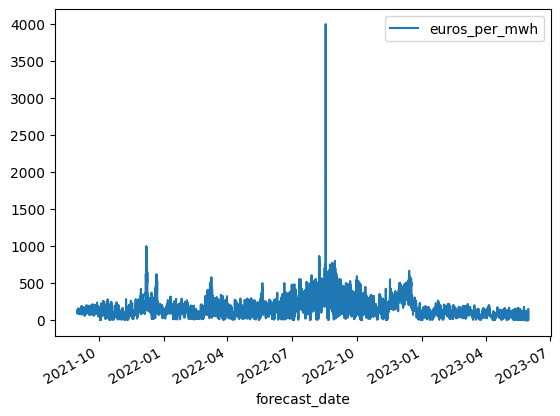

In [255]:
# Line plot to show the euro prices over the course of the training data

electricity_prices.plot(x='forecast_date', y='euros_per_mwh', kind='line')


<AxesSubplot:xlabel='forecast_date'>

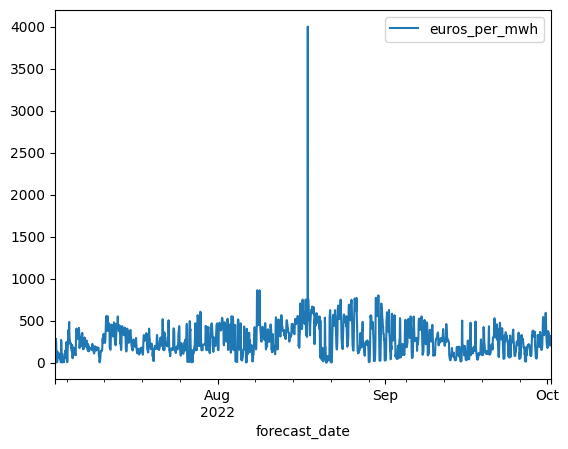

In [256]:
# Further zoomed in on the outlier

outlier = electricity_prices.query('forecast_date > "2022-07-01 19:00:00"').copy()
outlier_df = pd.DataFrame(outlier)

outlier.query('forecast_date < "2022-10-01 19:00:00"').plot(x='forecast_date', y='euros_per_mwh', kind='line')


In [257]:
# Outliers -> going to fill in the 4000 value with the previous hour's price. Going to investigate the others more

electricity_prices.query('euros_per_mwh > 900')

,forecast_date,euros_per_mwh,origin_date,data_block_id
2335,2021-12-07 07:00:00,1000.07,2021-12-06 07:00:00,98
2342,2021-12-07 14:00:00,976.98,2021-12-06 14:00:00,98
8416,2022-08-17 17:00:00,4000.00,2022-08-16 17:00:00,351


In [258]:
mask = electricity_prices['origin_date'] == "2022-08-16 17:00:00"
electricity_prices.loc[mask, 'euros_per_mwh'] = electricity_prices['euros_per_mwh'].shift(1)


<AxesSubplot:title={'center':'Euro prices between 12-1-2021 & 12-21-2021'}, xlabel='forecast_date', ylabel='euro per mwh price'>

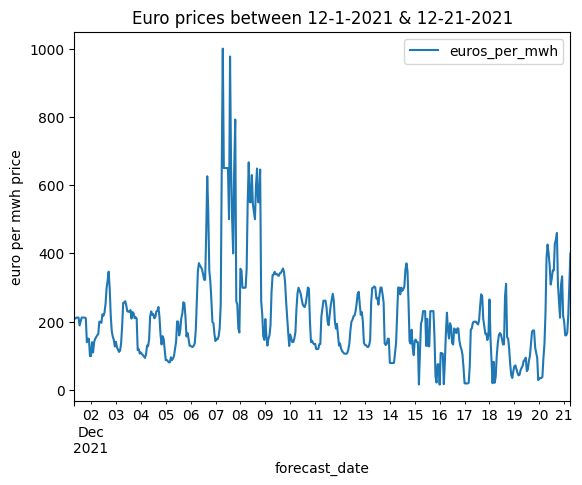

In [259]:
electricity_prices.query('forecast_date > "2021-12-01 07:00:00" & forecast_date < "2021-12-21 07:00:00"').plot(x='forecast_date', 
                                                                                                               y='euros_per_mwh', 
                                                                                                               kind='line',
                                                                                                               ylabel= 'euro per mwh price', 
                                                                                                               title="Euro prices between 12-1-2021 & 12-21-2021")

## Gas Prices EDA

In [260]:
eda(gas_prices)

List of columns: 
 Index(['forecast_date', 'lowest_price_per_mwh', 'highest_price_per_mwh',
       'origin_date', 'data_block_id'],
      dtype='object')

 DF Types: 
 forecast_date             object
lowest_price_per_mwh     float64
highest_price_per_mwh    float64
origin_date               object
data_block_id              int64
dtype: object

 DF Dimensions: 
 (637, 5)

 Missing Values: 
 forecast_date            0
lowest_price_per_mwh     0
highest_price_per_mwh    0
origin_date              0
data_block_id            0
dtype: int64

   forecast_date  lowest_price_per_mwh  highest_price_per_mwh origin_date  \
0    2021-09-01                 45.23                  46.32  2021-08-31   
1    2021-09-02                 45.62                  46.29  2021-09-01   
2    2021-09-03                 45.85                  46.40  2021-09-02   
3    2021-09-04                 46.30                  46.80  2021-09-03   
4    2021-09-05                 46.30                  46.58  2021-09-04   

<AxesSubplot:xlabel='forecast_date'>

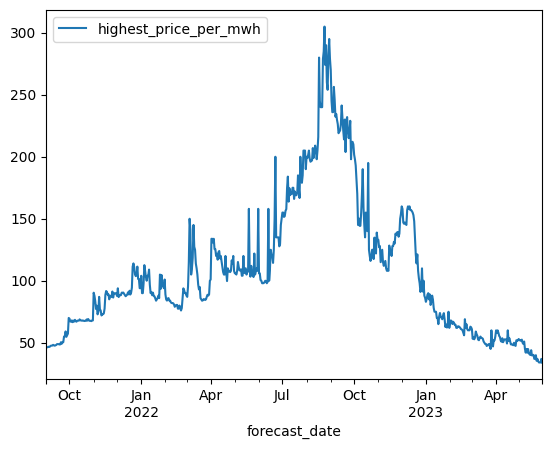

In [261]:
gas_prices.plot(x='forecast_date', y='highest_price_per_mwh', kind='line')


## Train EDA

In [262]:
eda(train)

List of columns: 
 Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id'],
      dtype='object')

 DF Types: 
 county                  int64
is_business             int64
product_type            int64
target                float64
is_consumption          int64
datetime               object
data_block_id           int64
row_id                  int64
prediction_unit_id      int64
dtype: object

 DF Dimensions: 
 (2018352, 9)

 Missing Values: 
 county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

    county  is_business  product_type  target  is_consumption  \
0       0            0             1   0.713               0   
1       0            0             1  96.590               1   
2       0            0 

In [263]:
train

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60


In [264]:
# Finding the production levels for each product type

def sqrt_prod_type(dataframe, product, bool):
    product_target_aggr = pd.DataFrame(columns=['target'])
    mask = (dataframe['product_type'] == product) & (dataframe['is_consumption'] == bool)
    product_target_aggr = dataframe.loc[mask, ['target']].reset_index(drop=True)

    prod_1 = product_target_aggr.sum().copy()

    sqrt = math.sqrt(prod_1)
    return sqrt


In [265]:
product_0_aggr = sqrt_prod_type(train, 0, False)
product_1_aggr = sqrt_prod_type(train, 1, False)
product_2_aggr = sqrt_prod_type(train, 2, False)
product_3_aggr = sqrt_prod_type(train, 3, False)
product_3_aggr
data = {'product': ["Combined", "Fixed", "General service", "Spot"],
    'target_aggr': [product_0_aggr, product_1_aggr, product_2_aggr, product_3_aggr]}
product_df = pd.DataFrame(data)
product_df = product_df.sort_values(by='target_aggr', ascending=True)
product_df


,product,target_aggr
2,General service,638.524123
0,Combined,1782.952109
1,Fixed,4008.040019
3,Spot,8375.274468


<AxesSubplot:title={'center':'Total aggregated production from each product type'}, xlabel='product', ylabel='target production'>

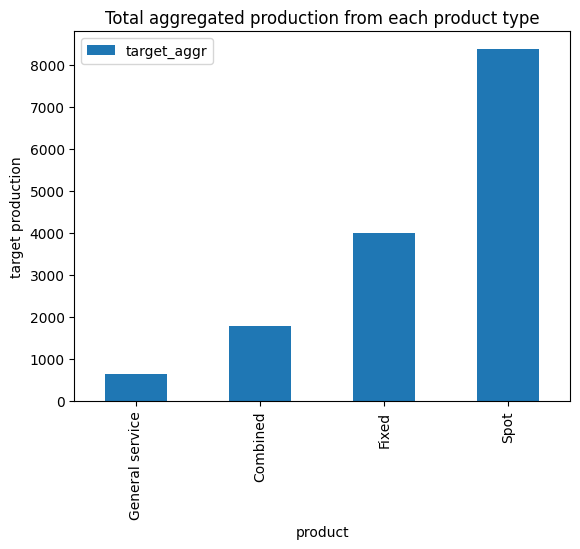

In [266]:
product_df.plot(x='product', 
                y='target_aggr', 
                ylabel='target production',
                kind='bar', 
                title='Total aggregated production from each product type')


In [267]:
train['is_consumption'] = train['is_consumption'].astype(bool)


<AxesSubplot:xlabel='datetime'>

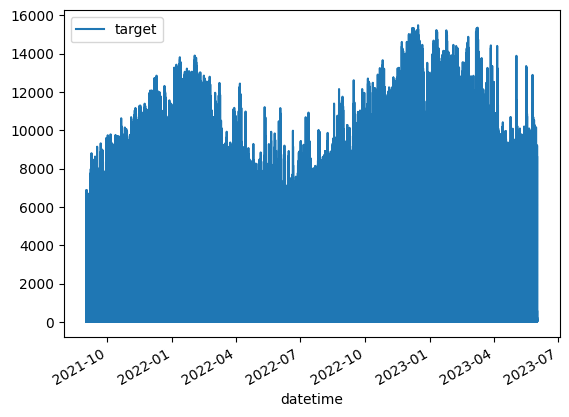

In [268]:
# Business customers - target over time

business = train.query('is_business == 1').copy()

business.plot(x='datetime', y='target', kind='line')

<AxesSubplot:xlabel='datetime'>

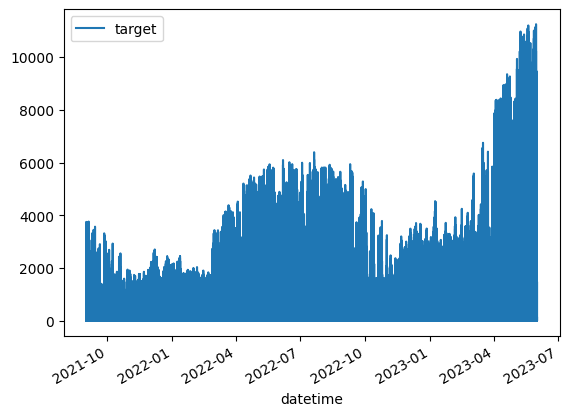

In [269]:
# Non-business customers - target over time

consumer = train.query('is_business == 0').copy()

consumer.plot(x='datetime', y='target', kind='line')

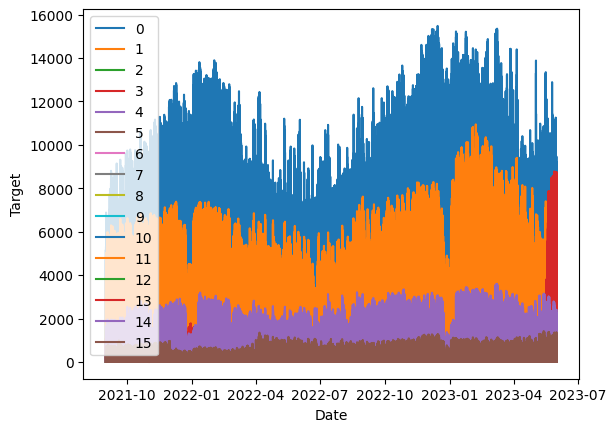

In [270]:
# Get the unique counties
counties = train['county'].unique()

# Create a separate plot for each county
for county in counties:
    # Filter the data for the current county
    county_data = train[train['county'] == county]
    
    # Plot the date as the x-axis and target as the y-axis
    plt.plot(county_data['datetime'], county_data['target'], label=county)
    
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()

# Show the plot
plt.show()


In [271]:
# Add the date features
date_features2(train)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,year,quarter,month,week,day
0,0,0,1,0.713,False,2021-09-01 00:00:00,0,0,0,2021,3,9,35,1
1,0,0,1,96.590,True,2021-09-01 00:00:00,0,1,0,2021,3,9,35,1
2,0,0,2,0.000,False,2021-09-01 00:00:00,0,2,1,2021,3,9,35,1
3,0,0,2,17.314,True,2021-09-01 00:00:00,0,3,1,2021,3,9,35,1
4,0,0,3,2.904,False,2021-09-01 00:00:00,0,4,2,2021,3,9,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,True,2023-05-31 23:00:00,637,2018347,64,2023,2,5,22,31
2018348,15,1,1,0.000,False,2023-05-31 23:00:00,637,2018348,59,2023,2,5,22,31
2018349,15,1,1,28.404,True,2023-05-31 23:00:00,637,2018349,59,2023,2,5,22,31
2018350,15,1,3,0.000,False,2023-05-31 23:00:00,637,2018350,60,2023,2,5,22,31


In [272]:
# Slicing out data to visualize the mean target(energy) production & consumption each quarter per year

# Production df
prod_df = train[train['is_consumption'] == False].groupby(['county', 'year', 'quarter'])['target'].mean().reset_index()
prod_df

consumption_df = train[train['is_consumption'] == True].groupby(['county', 'year', 'quarter'])['target'].mean().reset_index()
consumption_df

,county,year,quarter,target
0,0,2021,3,1235.707134
1,0,2021,4,1504.728238
2,0,2022,1,1728.227345
3,0,2022,2,1189.020359
4,0,2022,3,1254.608598
...,...,...,...,...
123,15,2022,2,129.387470
124,15,2022,3,171.148108
125,15,2022,4,247.001066
126,15,2023,1,275.860946


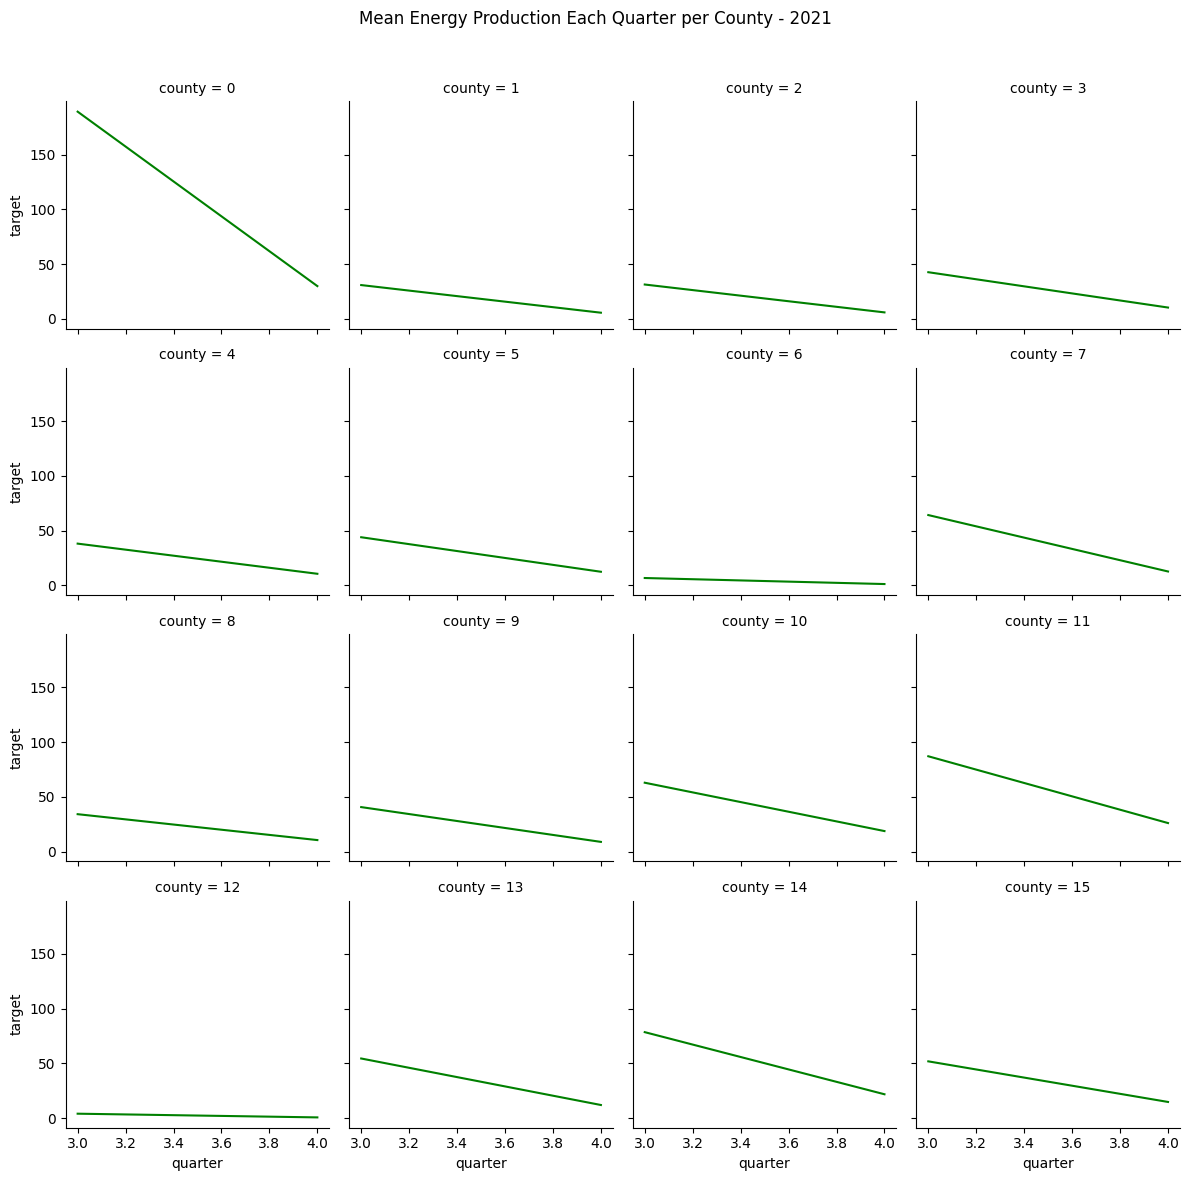

In [273]:
# 2021 Production per county per quarter visualization

train_2021 = prod_df.query('year == 2021')

g = sns.FacetGrid(train_2021, col='county', col_wrap=4)
g.map(sns.lineplot, "quarter", "target", color='green')

g.fig.suptitle("Mean Energy Production Each Quarter per County - 2021")

g.fig.tight_layout(rect=[0, 0, 1, 0.96])


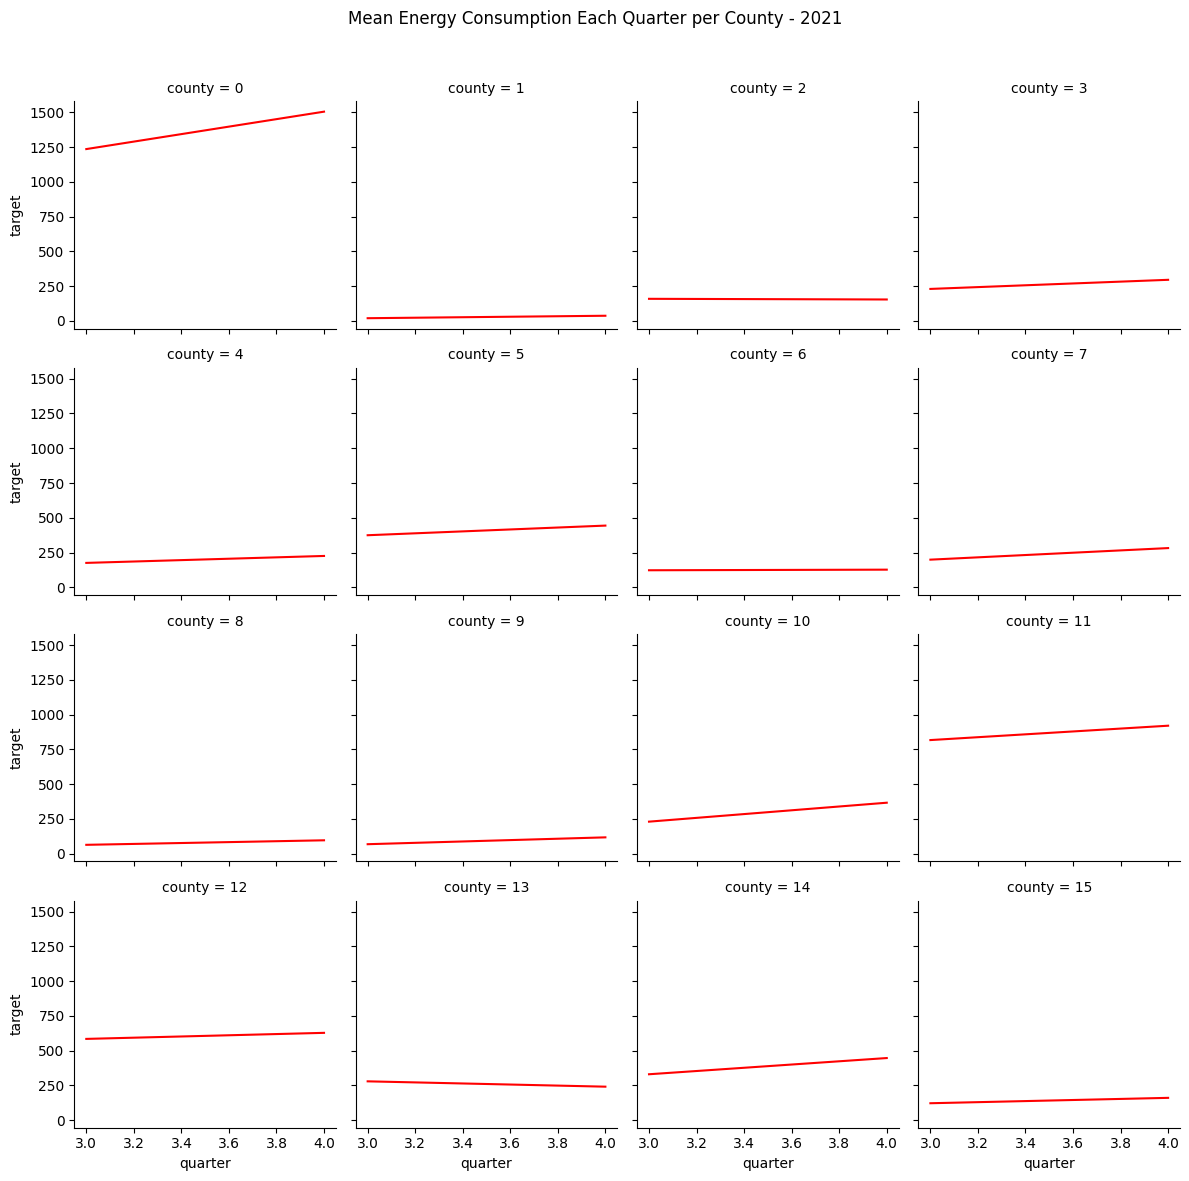

In [274]:
# 2021 Consumption per county per quarter visualization

train_2021 = consumption_df.query('year == 2021')

g = sns.FacetGrid(train_2021, col='county', col_wrap=4)
g.map(sns.lineplot, "quarter", "target", color='red')

g.fig.suptitle("Mean Energy Consumption Each Quarter per County - 2021")

g.fig.tight_layout(rect=[0, 0, 1, 0.96])


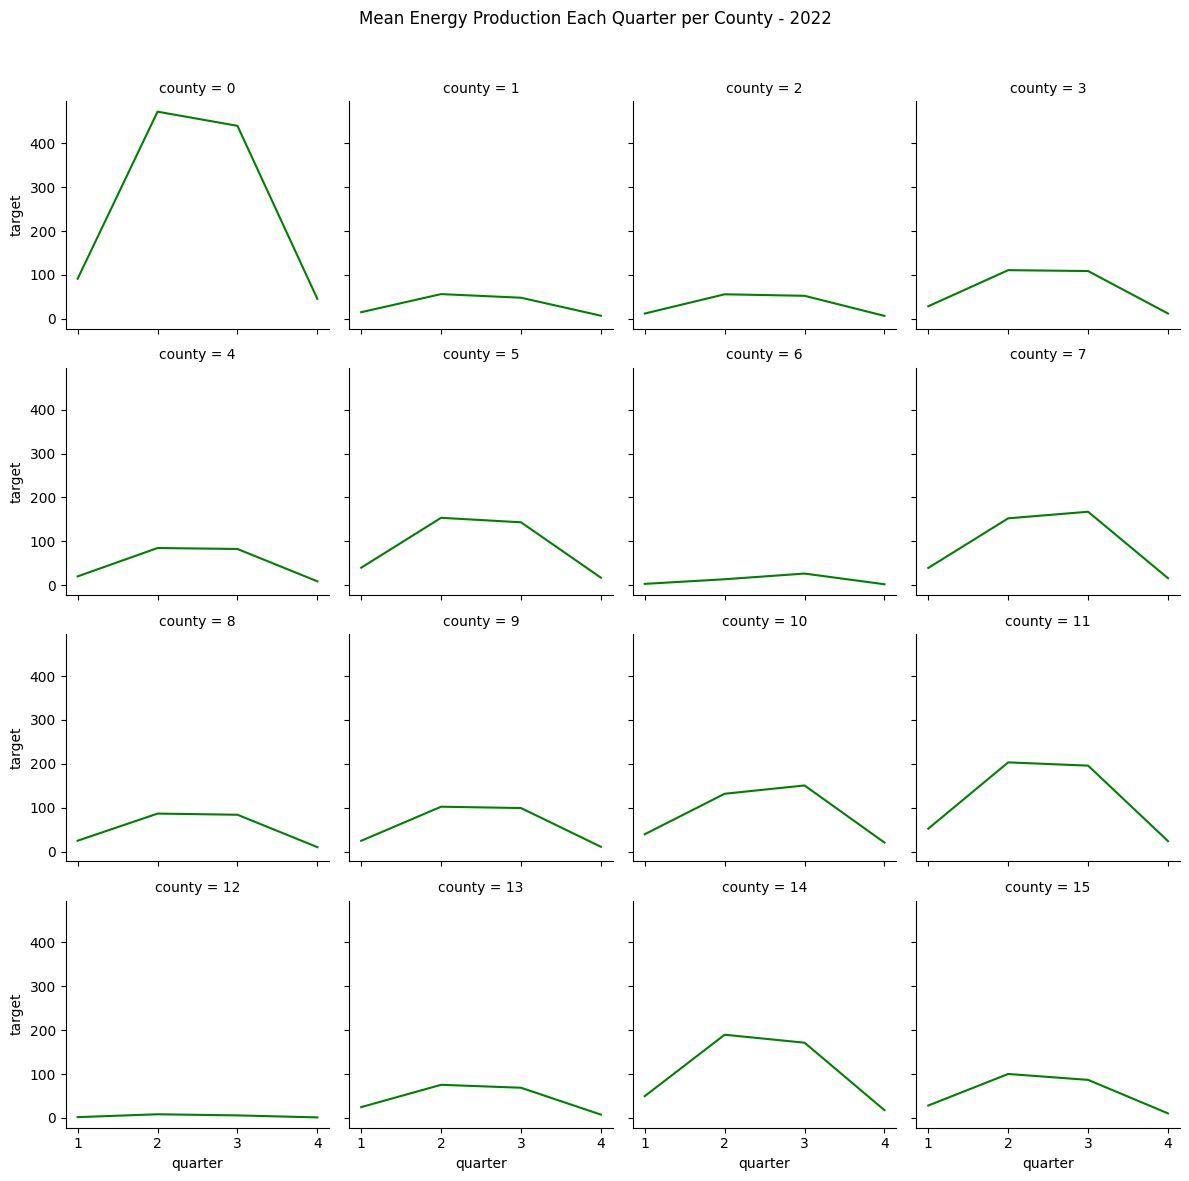

In [275]:
# 2022 Production per county per quarter visualization

train_2022 = prod_df.query('year == 2022')
g = sns.FacetGrid(train_2022, col='county', col_wrap=4, margin_titles=True)
g.map(sns.lineplot, "quarter", "target", color='green')

g.fig.suptitle("Mean Energy Production Each Quarter per County - 2022")

g.fig.tight_layout(rect=[0, 0, 1, 0.96])

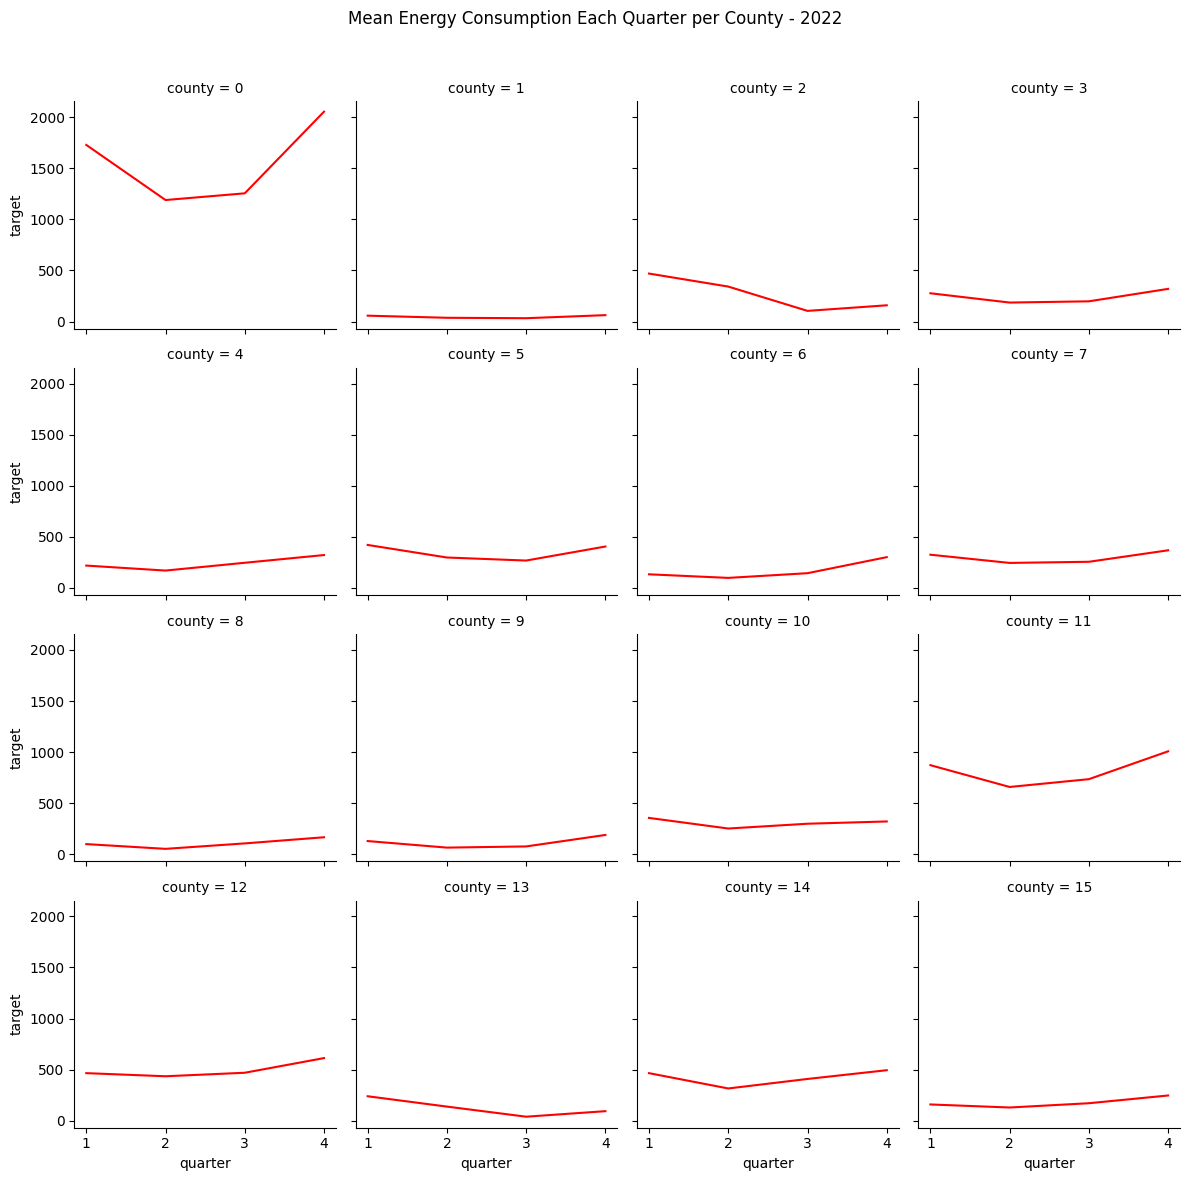

In [276]:
# 2022 Consumption per county per quarter visualization

train_2022 = consumption_df.query('year == 2022')
g = sns.FacetGrid(train_2022, col='county', col_wrap=4, margin_titles=True)
g.map(sns.lineplot, "quarter", "target", color='red')

g.fig.suptitle("Mean Energy Consumption Each Quarter per County - 2022")

g.fig.tight_layout(rect=[0, 0, 1, 0.96])

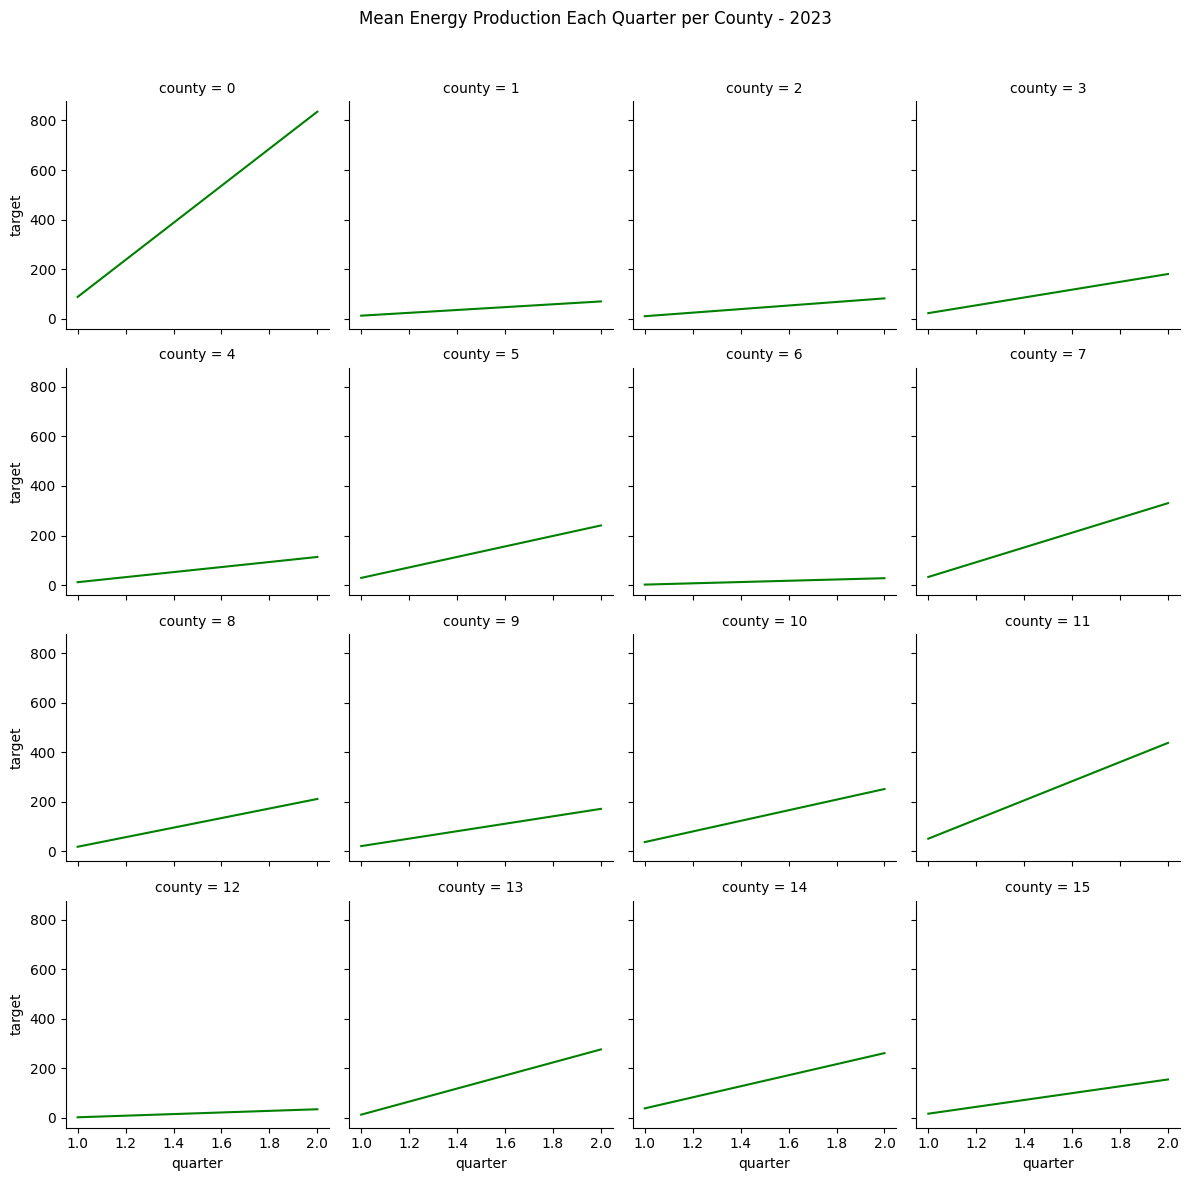

In [277]:
# 2023 Production per county per quarter visualization

train_2023 = prod_df.query('year == 2023')
g = sns.FacetGrid(train_2023, col='county', col_wrap=4)
g.map(sns.lineplot, "quarter", "target", color='green')

g.fig.suptitle("Mean Energy Production Each Quarter per County - 2023")

g.fig.tight_layout(rect=[0, 0, 1, 0.96])

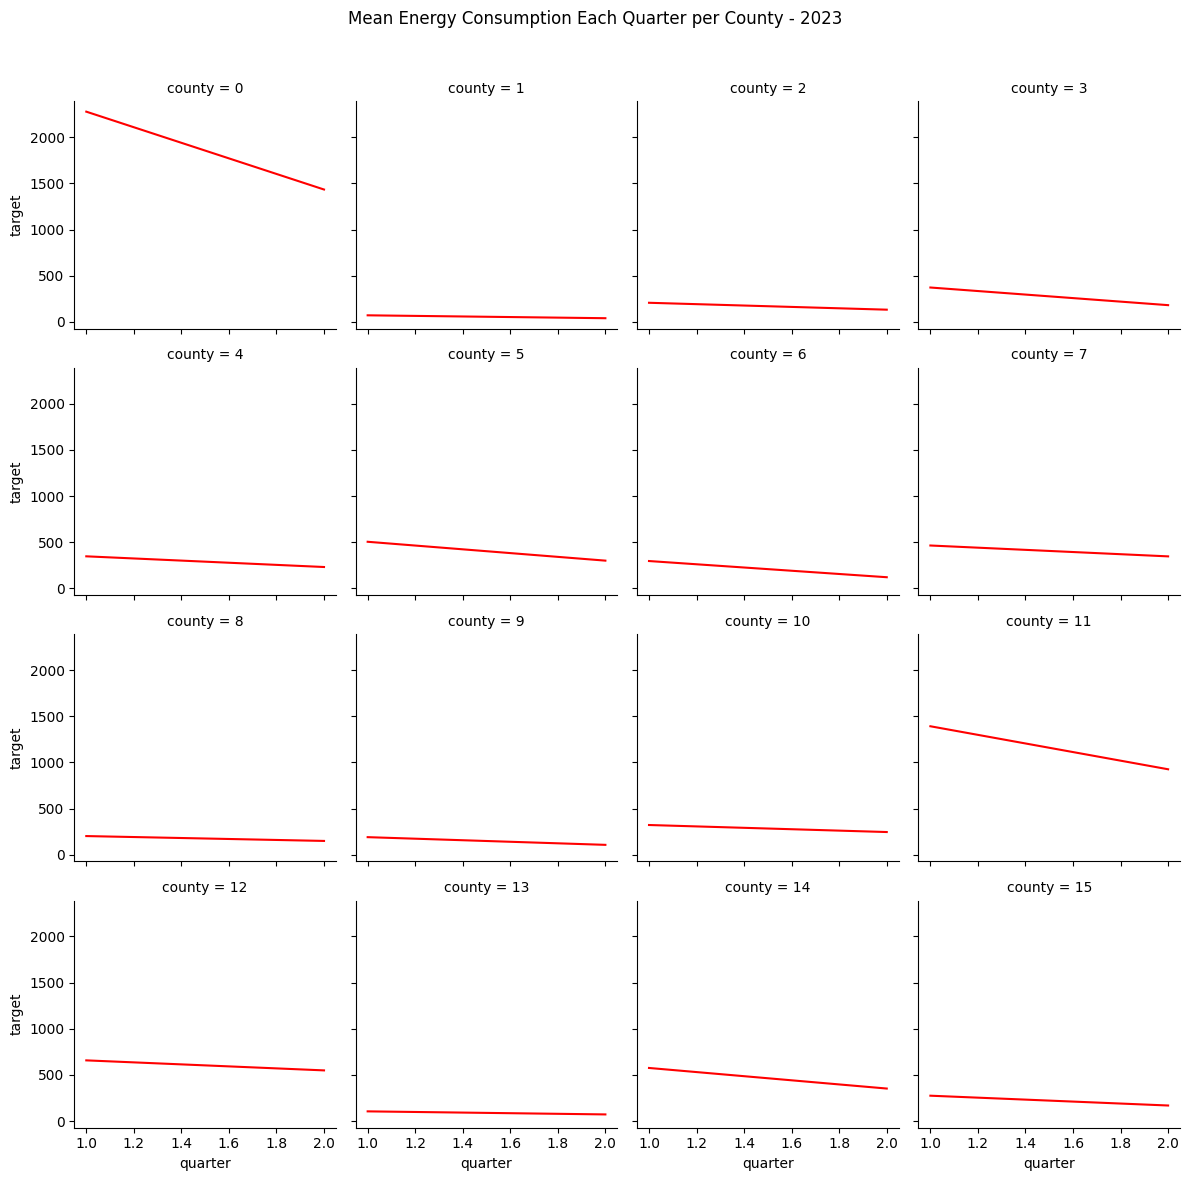

In [278]:
# 2023 Consumption per county per quarter visualization

train_2023 = consumption_df.query('year == 2023')
g = sns.FacetGrid(train_2023, col='county', col_wrap=4)
g.map(sns.lineplot, "quarter", "target", color='red')

g.fig.suptitle("Mean Energy Consumption Each Quarter per County - 2023")

g.fig.tight_layout(rect=[0, 0, 1, 0.96])

In [279]:
# Equal number of is consumption or production counts. for each client? group?


## Weather EDA

In [280]:
eda(forecast_weather)

List of columns: 
 Index(['latitude', 'longitude', 'origin_datetime', 'hours_ahead',
       'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'data_block_id', 'forecast_datetime',
       'direct_solar_radiation', 'surface_solar_radiation_downwards',
       'snowfall', 'total_precipitation'],
      dtype='object')

 DF Types: 
 latitude                             float64
longitude                            float64
origin_datetime                       object
hours_ahead                            int64
temperature                          float64
dewpoint                             float64
cloudcover_high                      float64
cloudcover_low                       float64
cloudcover_mid                       float64
cloudcover_total                     float64
10_metre_u_wind_component            float64
10_metre_v_wind_component            float64
data_bl

In [281]:
date_features3(forecast_weather)

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,...,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation,year,quarter,month,week,day
0,57.6,21.7,2021-08-31 23:00:00+00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,...,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0,2021,3,9,35,1
1,57.6,22.2,2021-08-31 23:00:00+00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,...,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0,2021,3,9,35,1
2,57.6,22.7,2021-08-31 23:00:00+00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,...,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0,2021,3,9,35,1
3,57.6,23.2,2021-08-31 23:00:00+00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,...,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0,2021,3,9,35,1
4,57.6,23.7,2021-08-31 23:00:00+00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,...,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0,2021,3,9,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424507,59.7,26.2,2023-05-29 23:00:00+00:00,48,10.150049,5.662744,0.061066,0.257339,0.004059,0.308594,...,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0,2023,2,5,22,31
3424508,59.7,26.7,2023-05-29 23:00:00+00:00,48,10.259790,5.922754,0.107880,0.895203,0.198700,0.906036,...,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0,2023,2,5,22,31
3424509,59.7,27.2,2023-05-29 23:00:00+00:00,48,10.467798,6.072534,0.000000,0.387466,0.448853,0.530518,...,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0,2023,2,5,22,31
3424510,59.7,27.7,2023-05-29 23:00:00+00:00,48,10.694116,7.009058,0.000000,0.505936,0.997314,0.997498,...,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0,2023,2,5,22,31


<AxesSubplot:xlabel='forecast_datetime'>

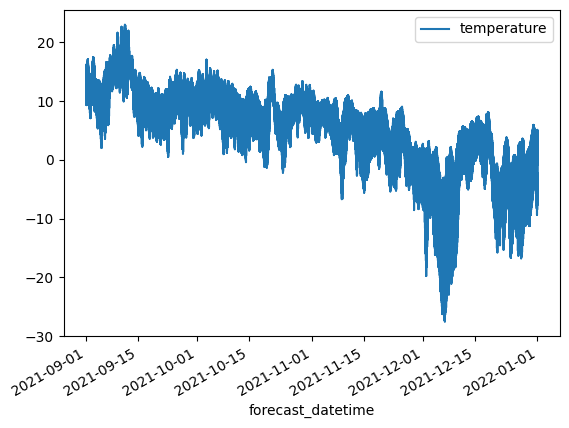

In [282]:
twtwone = forecast_weather.query('year == 2021')

twtwone.plot(x='forecast_datetime', y='temperature', kind='line')


In [283]:
twtwone_hist = historical_weather.query('year == 2021')
twtwone_hist.plot(x='datetime', y='temperature', kind='line')


UndefinedVariableError: name 'year' is not defined

In [314]:
train['week'] = train['week'].astype('int64')


List of columns: 
 Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id', 'year',
       'quarter', 'month', 'week', 'day'],
      dtype='object')

 DF Types: 
 county                         int64
is_business                    int64
product_type                   int64
target                       float64
is_consumption                  bool
datetime              datetime64[ns]
data_block_id                  int64
row_id                         int64
prediction_unit_id             int64
year                           int64
quarter                        int64
month                          int64
week                          UInt32
day                            int64
dtype: object

 DF Dimensions: 
 (2018352, 14)

 Missing Values: 
 county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_bloc

In [347]:
date_features2(historical_weather) 

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
historical_weather

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,...,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id,year,quarter,month,week,day
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,...,0.0,0.0,57.6,21.7,1.0,2021,3,9,35,1
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,...,0.0,0.0,57.6,22.2,1.0,2021,3,9,35,1
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,...,0.0,0.0,57.6,22.7,1.0,2021,3,9,35,1
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,...,277.0,81.0,57.6,23.2,1.0,2021,3,9,35,1
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,...,0.0,0.0,57.6,23.7,1.0,2021,3,9,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710797,2023-05-30 10:00:00,11.7,4.6,0.0,0.0,1018.9,40,9,54,0,...,392.0,175.0,59.7,26.2,637.0,2023,2,5,22,30
1710798,2023-05-30 10:00:00,12.3,3.5,0.0,0.0,1019.0,46,4,70,0,...,407.0,174.0,59.7,26.7,637.0,2023,2,5,22,30
1710799,2023-05-30 10:00:00,9.8,3.0,0.0,0.0,1019.2,41,4,62,0,...,432.0,177.0,59.7,27.2,637.0,2023,2,5,22,30
1710800,2023-05-30 10:00:00,11.7,1.6,0.0,0.0,1019.0,44,0,73,0,...,521.0,137.0,59.7,27.7,637.0,2023,2,5,22,30


In [304]:
train

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,year,quarter,month,week,day
0,0,0,1,0.713,False,2021-09-01 00:00:00,0,0,0,2021,3,9,35,1
1,0,0,1,96.590,True,2021-09-01 00:00:00,0,1,0,2021,3,9,35,1
2,0,0,2,0.000,False,2021-09-01 00:00:00,0,2,1,2021,3,9,35,1
3,0,0,2,17.314,True,2021-09-01 00:00:00,0,3,1,2021,3,9,35,1
4,0,0,3,2.904,False,2021-09-01 00:00:00,0,4,2,2021,3,9,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,True,2023-05-31 23:00:00,637,2018347,64,2023,2,5,22,31
2018348,15,1,1,0.000,False,2023-05-31 23:00:00,637,2018348,59,2023,2,5,22,31
2018349,15,1,1,28.404,True,2023-05-31 23:00:00,637,2018349,59,2023,2,5,22,31
2018350,15,1,3,0.000,False,2023-05-31 23:00:00,637,2018350,60,2023,2,5,22,31


In [309]:
selected_data

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,year,quarter,month,week,day
0,0,0,1,0.713,False,2021-09-01 00:00:00,0,0,0,2021,3,9,35,1
1,0,0,1,96.590,True,2021-09-01 00:00:00,0,1,0,2021,3,9,35,1
122,0,0,1,1.132,False,2021-09-01 01:00:00,0,122,0,2021,3,9,35,1
123,0,0,1,77.691,True,2021-09-01 01:00:00,0,123,0,2021,3,9,35,1
244,0,0,1,0.490,False,2021-09-01 02:00:00,0,244,0,2021,3,9,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274951,0,0,1,461.099,True,2021-12-01 21:00:00,91,274951,0,2021,4,12,48,1
275076,0,0,1,0.000,False,2021-12-01 22:00:00,91,275076,0,2021,4,12,48,1
275077,0,0,1,460.984,True,2021-12-01 22:00:00,91,275077,0,2021,4,12,48,1
275202,0,0,1,0.000,False,2021-12-01 23:00:00,91,275202,0,2021,4,12,48,1


In [356]:
forecast_weather.query('longitude == 21.7 & latitude == 57.6 & data_block_id == 1').head(10)

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,...,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation,year,quarter,month,week,day
0,57.6,21.7,2021-08-31 23:00:00+00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,...,2021-09-01 00:00:00+00:00,0.000000,0.000000,0.0,0.000000e+00,2021,3,9,35,1
112,57.6,21.7,2021-08-31 23:00:00+00:00,2,15.779688,11.991479,0.876266,0.477631,0.000336,0.910034,...,2021-09-01 01:00:00+00:00,0.000000,0.000000,0.0,0.000000e+00,2021,3,9,35,1
224,57.6,21.7,2021-08-31 23:00:00+00:00,3,15.813745,12.260400,0.943588,0.555756,0.072083,0.976318,...,2021-09-01 02:00:00+00:00,0.000000,0.000000,0.0,2.682209e-07,2021,3,9,35,1
336,57.6,21.7,2021-08-31 23:00:00+00:00,4,15.852930,12.277612,0.985764,0.471283,0.043793,0.989487,...,2021-09-01 03:00:00+00:00,2.515556,2.367527,0.0,3.039837e-06,2021,3,9,35,1
448,57.6,21.7,2021-08-31 23:00:00+00:00,5,15.797754,11.416040,0.981354,0.206161,0.000000,0.985138,...,2021-09-01 04:00:00+00:00,33.148941,42.714209,0.0,0.000000e+00,2021,3,9,35,1
560,57.6,21.7,2021-08-31 23:00:00+00:00,6,15.498804,10.584009,0.677917,0.133423,0.000000,0.722290,...,2021-09-01 05:00:00+00:00,201.942118,151.258524,0.0,0.000000e+00,2021,3,9,35,1
672,57.6,21.7,2021-08-31 23:00:00+00:00,7,15.274377,10.349634,0.886246,0.139160,0.000000,0.901928,...,2021-09-01 06:00:00+00:00,514.530521,295.758490,0.0,-2.980232e-08,2021,3,9,35,1
784,57.6,21.7,2021-08-31 23:00:00+00:00,8,15.152551,9.351953,0.778854,0.859375,0.000000,0.967297,...,2021-09-01 07:00:00+00:00,663.937170,424.081528,0.0,6.467104e-06,2021,3,9,35,1
896,57.6,21.7,2021-08-31 23:00:00+00:00,9,15.073816,9.226709,0.573410,0.946136,0.000031,0.976062,...,2021-09-01 08:00:00+00:00,332.265417,385.917778,0.0,3.227592e-05,2021,3,9,35,1
1008,57.6,21.7,2021-08-31 23:00:00+00:00,10,14.928918,9.448267,0.652069,0.708160,0.000015,0.896097,...,2021-09-01 09:00:00+00:00,365.285000,435.984167,0.0,5.596876e-05,2021,3,9,35,1


In [358]:
train_schema = train.schema

AttributeError: 'DataFrame' object has no attribute 'schema'

In [357]:
historical_weather.query('longitude == 21.7 & latitude == 57.6 & data_block_id == 1').head(10)

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
112,2021-09-01 01:00:00,14.1,11.4,0.0,0.0,1016.2,47,25,0,83,7.472222,8,0.0,0.0,0.0,57.6,21.7,1.0
224,2021-09-01 02:00:00,14.2,11.4,0.0,0.0,1016.1,52,30,0,83,7.361111,8,0.0,0.0,0.0,57.6,21.7,1.0
336,2021-09-01 03:00:00,14.3,11.2,0.0,0.0,1016.0,34,21,1,49,7.333333,5,0.0,0.0,0.0,57.6,21.7,1.0
448,2021-09-01 04:00:00,14.6,11.3,0.0,0.0,1016.0,53,31,17,49,7.527778,4,0.0,0.0,0.0,57.6,21.7,1.0
560,2021-09-01 05:00:00,14.8,11.6,0.0,0.0,1015.9,55,18,29,71,7.000000,359,0.0,0.0,0.0,57.6,21.7,1.0
672,2021-09-01 06:00:00,14.9,11.8,0.0,0.0,1015.6,65,22,29,92,7.000000,358,3.0,0.0,3.0,57.6,21.7,1.0
784,2021-09-01 07:00:00,15.1,11.6,0.0,0.0,1015.9,57,15,28,90,7.722222,355,58.0,16.0,42.0,57.6,21.7,1.0
896,2021-09-01 08:00:00,15.4,11.1,0.0,0.0,1015.8,66,33,17,86,8.055556,353,151.0,51.0,100.0,57.6,21.7,1.0
1008,2021-09-01 09:00:00,15.0,11.8,0.0,0.0,1016.1,48,22,3,87,8.166667,348,211.0,75.0,136.0,57.6,21.7,1.0


In [333]:
selected_data

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,year,quarter,month,week,day
1,0,0,1,96.590,True,2021-09-01 00:00:00,0,1,0,2021,3,9,35,1
123,0,0,1,77.691,True,2021-09-01 01:00:00,0,123,0,2021,3,9,35,1
245,0,0,1,91.594,True,2021-09-01 02:00:00,0,245,0,2021,3,9,35,1
367,0,0,1,87.955,True,2021-09-01 03:00:00,0,367,0,2021,3,9,35,1
489,0,0,1,88.184,True,2021-09-01 04:00:00,0,489,0,2021,3,9,35,1
611,0,0,1,89.781,True,2021-09-01 05:00:00,0,611,0,2021,3,9,35,1
733,0,0,1,96.481,True,2021-09-01 06:00:00,0,733,0,2021,3,9,35,1
855,0,0,1,94.592,True,2021-09-01 07:00:00,0,855,0,2021,3,9,35,1
977,0,0,1,77.308,True,2021-09-01 08:00:00,0,977,0,2021,3,9,35,1
1099,0,0,1,54.211,True,2021-09-01 09:00:00,0,1099,0,2021,3,9,35,1


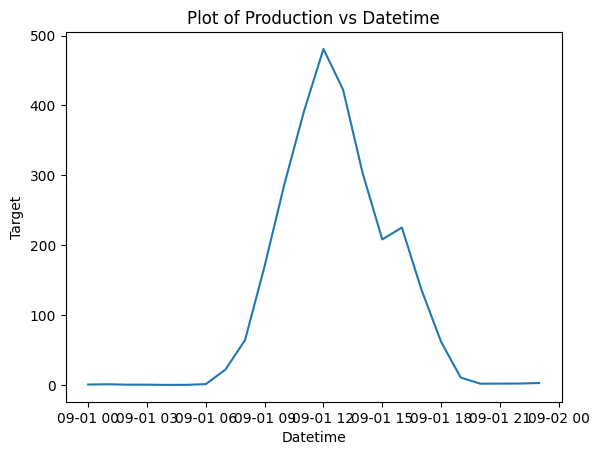

In [334]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Visualizing the production on a given day

selected_data = train.query('year == 2021 & day == 1 & prediction_unit_id == 0 & data_block_id == 0 & is_consumption == False')

plt.plot(selected_data['datetime'], selected_data['target'])
plt.xlabel('Datetime')
plt.ylabel('Target')
plt.title('Plot of Production vs Datetime')


plt.show()


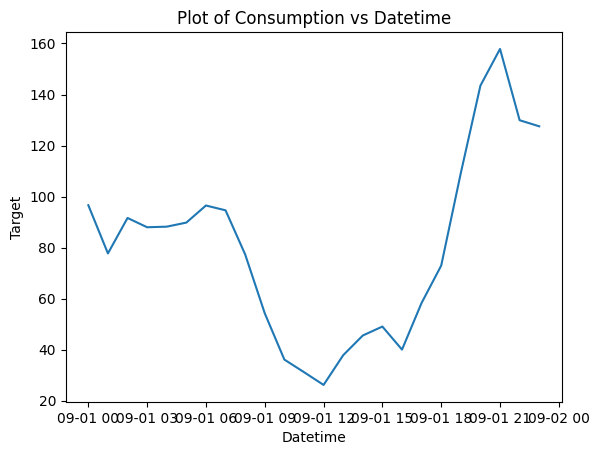

In [335]:
# visualizing the consumption on a given day

selected_data = train.query('year == 2021 & day == 1 & prediction_unit_id == 0 & data_block_id == 0 & is_consumption == True')

plt.plot(selected_data['datetime'], selected_data['target'])
plt.xlabel('Datetime')
plt.ylabel('Target')
plt.title('Plot of Consumption vs Datetime')


plt.show()


## Print df out to visualize joining

In [ ]:
from pandas.plotting import table


In [ ]:
def to_csv(dataframe, filename):
    dataframe.to_csv(f'{filename}.csv', index=False)


In [ ]:
to_csv(train.head(15), 'train_15')

In [296]:
eda(train)

List of columns: 
 Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id', 'year',
       'quarter', 'month', 'week', 'day'],
      dtype='object')

 DF Types: 
 county                         int64
is_business                    int64
product_type                   int64
target                       float64
is_consumption                  bool
datetime              datetime64[ns]
data_block_id                  int64
row_id                         int64
prediction_unit_id             int64
year                           int64
quarter                        int64
month                          int64
week                          UInt32
day                            int64
dtype: object

 DF Dimensions: 
 (2018352, 14)

 Missing Values: 
 county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_bloc

client = pd.read_csv('client.csv')
electricity_prices = pd.read_csv('electricity_prices.csv')
gas_prices = pd.read_csv('gas_prices.csv')
historical_weather = pd.read_csv('historical_weather.csv')
forecast_weather = pd.read_csv('forecast_weather.csv')
train = pd.read_csv('train.csv')
county_lon_lat